In [1]:
import numpy as np
from scipy.optimize import leastsq
from matplotlib import pylab as pl

%matplotlib inline

Реальные параметры: [10, 0.34, 0.5235987755982988]
Параметры подгонки [-9.5754384   0.34131257 -2.61160035]


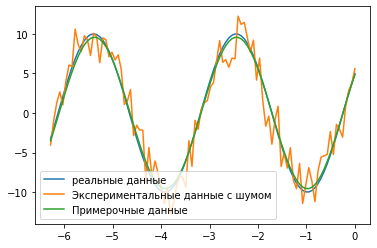

In [9]:
def func(x, p):
# Функция, используемая для подбора данных: A * sin (2 * pi * k * x + theta)
    A, k, theta = p
    return A*np.sin(2*np.pi*k*x+theta)

def residuals(p, y, x):
# Разница между экспериментальными данными x, y и функцией подбора, p - это коэффициент, который можно найти во время подбора
    return y - func(x, p)

x = np.linspace(0, -2*np.pi, 100)
A, k, theta = 10, 0.34, np.pi/6 # Функция параметров реальных данных
y0 = func(x, [A, k, theta]) # реальные данные
y1 = y0 + 2 * np.random.randn(len(x)) # Экспериментальные данные после добавления шума

p0 = [7, 0.2, 0] # Первая угаданная функция подгонки параметров

# Вызовите leastsq для подбора данных
# residuals - функция вычисления ошибки
# p0 - начальное значение подгоночных параметров
# args - это экспериментальные данные, которые нужно подогнать
plsq = leastsq(residuals, p0, args=(y1, x))

print(u"Реальные параметры:", [A, k, theta])
print(u"Параметры подгонки", plsq[0]) # Параметры после подгонки экспериментальных данных

pl.plot(x, y0, label=u"реальные данные")
pl.plot(x, y1, label=u"Экспериментальные данные с шумом")
pl.plot(x, func(x, plsq[0]), label=u"Примерочные данные")
pl.legend()